<a href="https://colab.research.google.com/github/srbee/HelloWorld/blob/master/Copy_of_Copy_of_myDFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Google Colab Note Book

-------------------SRB---/22 April 2019--------




Let us write the DFT program ( once again !) 

x---> array of samples

N --> No. of samples

Xmag--> outpput array containing DFT magnitude values

Xmag_s --> shifted Xmag for FFT shift (MATLAB)  type display

h  --> enumeration of harmonics starting from 0 to N-1

h_s  --> shifted version of above for FFT shift type display

Xph --> output array containing DFT phase values


Input samples x =  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 100. 100. 100. 100. 100. 100.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]
No. of input samples =   44


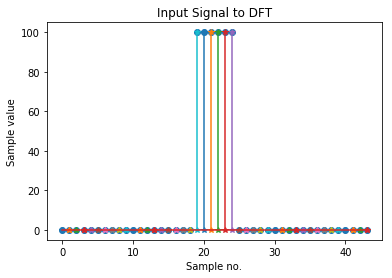

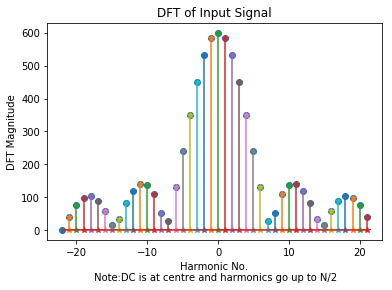

In [0]:

import math
import matplotlib.pyplot as plot
import numpy as np

# ======== Signal Gallery ===============================
# ==== Add sine,cosine and trapezoidal waves ============
# ===== Make it interactive ============================
# ====== myDFT(signal) should be a function ============
pulse=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
       100,100,100,100,100,100,\
        0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
      ]

impulse1=[0 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
          100,\
          0  ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
         ]

impulse2=[100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
          0  ,\
          0  ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\
         ]

impulse3=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
          0,\
          0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100\
         ]

rising=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,\
        18,19,20,21,22,23,24,25,26,27,28,29,30,31,\
        32,33,34,35,36,37,38,39,40,41,42,43,44,45,46\
       ]

sawtooth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,\
          0,\
          1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17\
         ]

triangular=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,\
            16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0\
         ]

maxfreq=[-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,\
         1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,\
        ]
dc=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
    1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
   ]

# ========== End of signal gallery =============================

x=np.array(pulse,'float')
#x=np.array(dc,'float')

print("Input samples x = ",x)
N=len(x)
harm_no=np.arange(N) # harmonic number
print("No. of input samples =  ",N)
ZeroToN=range(N)
X    = np.zeros(N) # Cap X Initialize the output samples to zero MATLAB like ! 
Xcos = np.zeros(N)
Xsin = np.zeros(N)
Xmag = np.zeros(N)
Xph  = np.zeros(N)

# Remember it is np.zeros(N) and not just zeros(N)
for m in ZeroToN:
  X[m]=0
  
for m in ZeroToN:
  for n in ZeroToN:
    #print(m,n)
    Xcos[m]=Xcos[m]+x[n]*math.cos((2*math.pi*m*n)/N)
    Xsin[m]=Xsin[m]+x[n]*math.sin((2*math.pi*m*n)/N)
    Xmag[m]=math.sqrt(Xcos[m]*Xcos[m]+Xsin[m]*Xsin[m])
    Xph[m] =math.degrees(math.atan2(Xsin[m],Xcos[m]))

#print('Xcos = ',Xcos)
#print('Xsin = ',Xsin)
#print('Xmag = ',Xmag)
#print('Xph(degrees) = ',Xph)

import scipy as sp
y=sp.fft(x)
#print(y)

ymag=abs(y)
#print(ymag)
#print(Xmag-ymag)



# FFT shift type of display 
# so that harm_no goes only upto N/2

Nby2=int(N/2); # type casting to int since np.roll() needs integer argument
Xmag_s=np.roll(Xmag,Nby2)# for circularly shifting samples
h_s=harm_no-Nby2; 

# ==== plot the samples of input signal
markerline,stemlines,baseline=plot.stem(harm_no,x,'-*')
plot.xlabel('Sample no.')
plot.ylabel('Sample value')
plot.title('Input Signal to DFT')
plot.show()
# ==== plot the samples of output ( DFT )
markerline,stemlines,baseline=plot.stem(h_s,Xmag_s,'-*')
plot.xlabel('Harmonic No.\n Note:DC is at centre and harmonics go up to N/2')
plot.ylabel('DFT Magnitude')
plot.title('DFT of Input Signal')
plot.show()